In [62]:
print("""
@Description: Customizing Colorbars
@Author: Stephen CUI
@Time: 2023-04-07 11:05:34
""")


@Description: Customizing Colorbars
@Author: Stephen CUI
@Time: 2023-04-07 11:05:34



# Customizing Colorbars

In [63]:
import matplotlib.pyplot as plt
import numpy as np

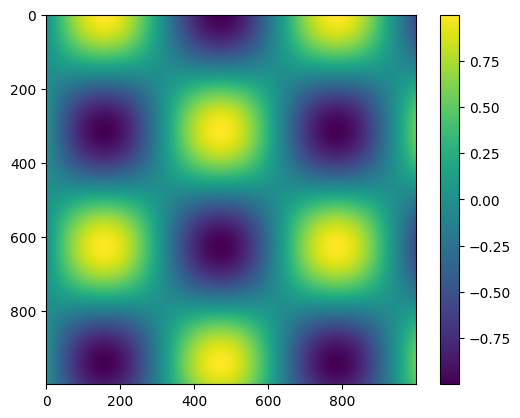

In [64]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
plt.imshow(I)
# plt.imshow(I, extent=[0, 10, 0, 10], origin='lower', aspect='equal')
plt.colorbar()
plt.show()

## Customizing Colorbars

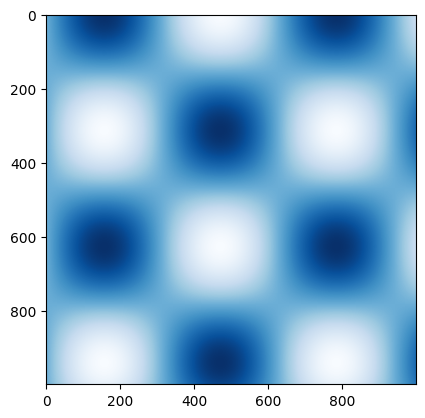

In [65]:
plt.imshow(I, cmap='Blues')

In [66]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_map(cmap):
    cmap = plt.colormaps.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    RGB_weight = [.299, .587, .114]
    luminance =np.sqrt(np.dot(colors[:,:3] ** 2, RGB_weight))
    colors[:,:3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(
        cmap.name + 'gray', colors, cmap.N
    )
    
def view_colormap(cmap):
    cmap = plt.colormaps.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    cmap = grayscale_map(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

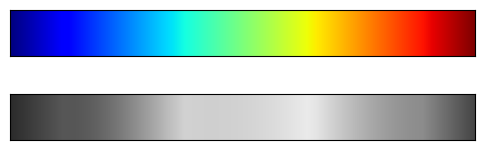

In [67]:
view_colormap('jet')

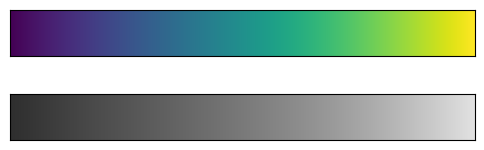

In [68]:
view_colormap('viridis')

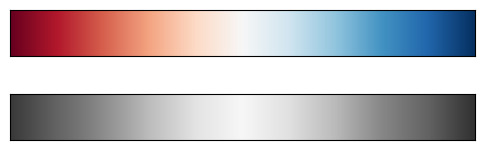

In [69]:
view_colormap('RdBu')

### Color Limits and Extensions

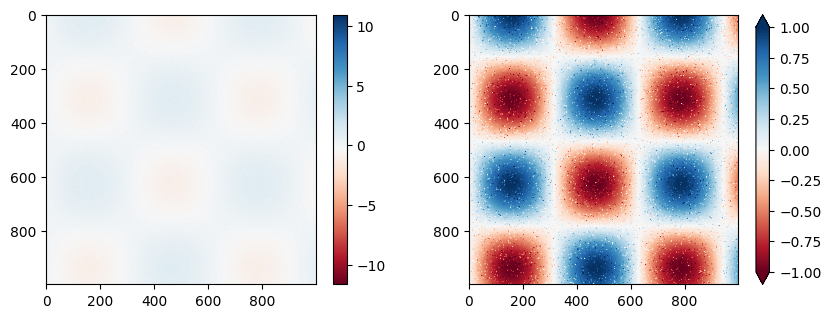

In [70]:
# speckles = (np.random.random(I.shape) < .01)
# # 这里使用的是 fancy index， I[speckles] 返回的是一维数组
# I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))
plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1)

### Discrete Colorbars

C:\Users\19243\AppData\Local\Temp\ipykernel_14484\3561748264.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))


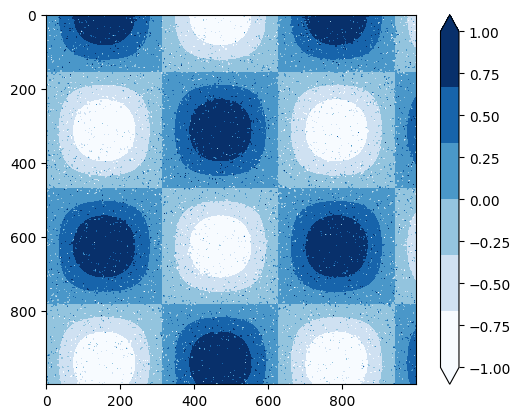

In [82]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar(extend='both')
plt.clim(-1, 1)

## Example: Handwritten Digits

In [83]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)

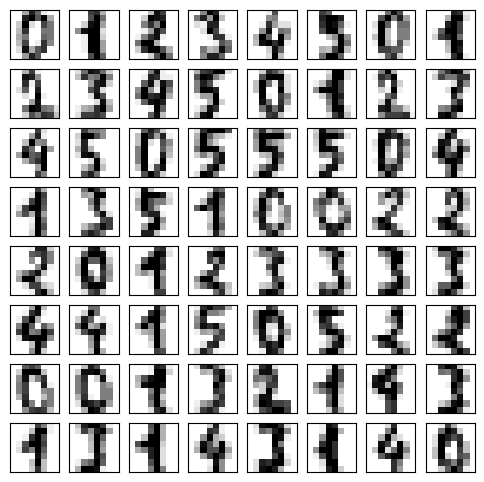

In [86]:
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.ravel()):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [87]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2, n_neighbors=15)
projection = iso.fit_transform(digits.data)

C:\Users\19243\AppData\Local\Temp\ipykernel_14484\1321368633.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c=digits.target, cmap=plt.cm.get_cmap('plasma', 6))


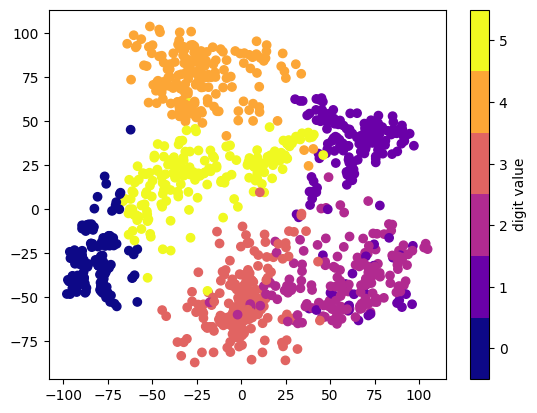

In [98]:
plt.scatter(projection[:, 0], projection[:, 1], lw=1,
            c=digits.target, cmap=plt.cm.get_cmap('plasma', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-.5, 5.5)